# Quantum Teleportation Algorithm

- What is Quantum Teleportation?
    - It is the transfer of quantum states from one qubit to another.
    - It doesn't mean physically transporting a qubit from one place to another.
    - It is the transportation of quantum information from one qubit to another.
    
- Why we do it?
    - In a classical computer, copying something and transferring it to another place isn't a problem.
    - In quantum computers, copying is not allowed, since the moment you copy you're implicitly doing a measurement
        which destroys the quantum state that you're trying to transfer from point A to point B.
    - In order to get around it, we take advantage of entanglement and build a quantum teleportation circuit.

In [1]:
from qiskit import *

In [2]:
# Quantum circuit of 3 quantum bits and 3 classical bits
circuit = QuantumCircuit(3, 3)

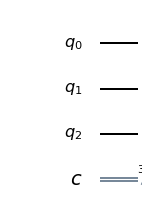

In [3]:
circuit.draw(output='mpl')

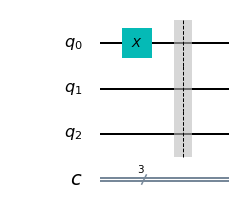

In [4]:
# We take the state in q0 to q2; q1 is used as a resource for this process.
circuit.x(0)
circuit.barrier()
circuit.draw(output='mpl')

In [5]:
# Apply hadamard gate
circuit.h(1)

# Apply controlled x gate betwen q1 and q2
circuit.cx(1, 2)

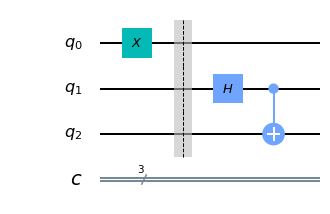

In [6]:
circuit.draw(output='mpl')

Now, q1 and q2 are entangled. The rest of the teleportation protocol dicates that we apply the following two gates:

- A controlled X gate going from q0 to q1.

- A hadamard gate on q0.

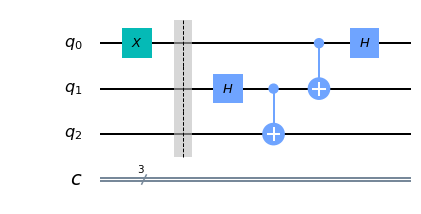

In [7]:
circuit.cx(0, 1)
circuit.h(0)
circuit.draw(output='mpl')

There's one more missing aspect to the teleportation circuit, and that is to do two measurements.
The measurements are going to be on q0 and q1.

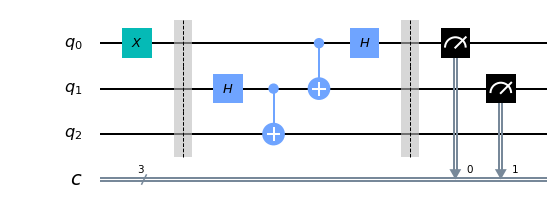

In [9]:
circuit.barrier()
circuit.measure([0, 1], [0, 1])
circuit.draw(output='mpl')

To complete teleportation protocol, we need to add two more gates, as shown below:

- Controlled x going from q1 to q2
- Controlled z going from q0 to q2

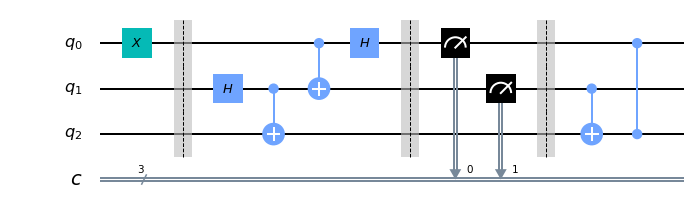

In [11]:
circuit.barrier()
circuit.cx(1, 2)
circuit.cz(0, 2)
circuit.draw(output='mpl')

### Simulation

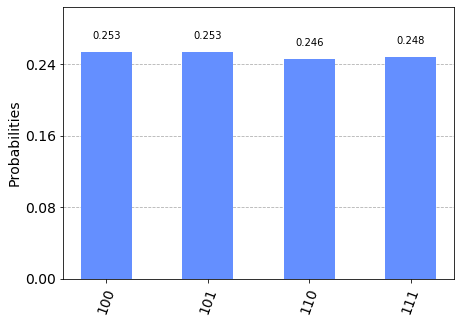

In [12]:
circuit.measure(2, 2)
simulator = Aer.get_backend('qasm_simulator')

result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()

from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

### Results
The x-axis is to be read as C2, C1, C0 in classical bits.

So 100 is read as result on C2=1, C1=0, C0=0.

So as we can see, we only get results where C2 equals to 1. This means the measurement results always have the state we want in that particular qubit, q2.

In [13]:
print(counts)

{'101': 259, '111': 254, '110': 252, '100': 259}


- So, what we've done is take the state in q0 and teleported it to the state in q2.
- There are many applications to this.
    - The key element is that there's **entanglement** here, which allows to take these two qubits far apart from each other.
    - This allows us to transfer quantum information over long distances.
    
TO DO:
- Try teleporting the state zero plus one over the square root of two.
    - This is the quantum state that you get when you apply a Hadamard gate, onto the zero quantum state.